# **Load the Data**

**Business Understanding**

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.
Understanding the 4 C's

- Cut
- Color
- Clarity
- Carat


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diamonds_dataset.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **Missing Values, Duplicates and Outliers**

In [9]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [8]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [11]:
df.duplicated().sum()

np.int64(146)

In [12]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [13]:
df[df.duplicated()]

(53940, 10)

In [15]:
df = df.drop_duplicates()

df.shape

(53794, 10)

# **Identify Input and Output**

In [16]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [17]:
# Define the predictors (X) and target variable (y)

X = df.drop(columns=['price'])

y = df['price']

# **Apply Data Preprocessing**

In [19]:
X.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
x,float64
y,float64
z,float64


In [20]:
# Separating Categorical and Numerical Columns

X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(include=['int64', 'float64'])

In [21]:
X_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [22]:
X_num.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [23]:
# Rescaling numerical features
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_num_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_num),
                                 columns = minmax_scaler.get_feature_names_out(),
                                 index = X_num.index)

X_num_transformed.head()

,carat,depth,table,x,y,z
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478


In [24]:
# Rescaling numerical features
# from sklearn.preprocessing import StandardScaler

In [28]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop="first",
                               sparse_output=False,
                               handle_unknown="ignore")

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_cat),
                               columns=onehot_encoder.get_feature_names_out(),
                               index = X_cat.index)

print("Shape of Data before Transformation:", X_cat.shape)
print("Shape of Data after Transformation:", X_cat_tansformed.shape)

X_cat_tansformed.head()

Shape of Data before Transformation: (53794, 3)
Shape of Data after Transformation: (53794, 17)


,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
# Ordinal Encoding the categorical features
from sklearn.preprocessing import OrdinalEncoder

# Define the ordering for categorical columns (lowest to highest)
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

ordinal_encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories],
                                 handle_unknown="use_encoded_value",
                                 unknown_value=-1,
                                 encoded_missing_value=-5)

# Apply the encoding
X_cat_transformed = pd.DataFrame(ordinal_encoder.fit_transform(X_cat),
                                     columns=ordinal_encoder.get_feature_names_out(),
                                     index = X_cat.index)

X_cat_transformed.head()

,cut,color,clarity
0,4.0,5.0,1.0
1,3.0,5.0,2.0
2,1.0,5.0,4.0
3,3.0,1.0,3.0
4,1.0,0.0,1.0


In [30]:
X_transformed = pd.concat([X_num_transformed, X_cat_transformed], axis=1)

X_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,4.0,5.0,1.0
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,3.0,5.0,2.0
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,1.0,5.0,4.0
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,3.0,1.0,3.0
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,1.0,0.0,1.0


# **Split into Train and Test**

In [31]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40345, 9) (40345,)
(13449, 9) (13449,)


# **Building the Model**

In [32]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 813.4662210799144

CPU times: user 174 ms, sys: 26.2 ms, total: 200 ms
Wall time: 311 ms


In [33]:
output_df = pd.DataFrame({'Actual': y_test})

output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
28297,432,247.280662
17356,6964,5571.289296
48882,2037,2569.840857
19901,8451,6993.780677
44377,1581,1614.433210
...,...,...
23346,422,-1179.226825
25751,14692,10347.630456
9447,4594,5222.453468
13489,5537,6378.710212


In [35]:
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 388.0421295263588

CPU times: user 895 ms, sys: 6.31 ms, total: 901 ms
Wall time: 928 ms


In [36]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
28297,432,247.280662,522.0
17356,6964,5571.289296,6027.0
48882,2037,2569.840857,2014.0
19901,8451,6993.780677,8745.2
44377,1581,1614.433210,1669.8
...,...,...,...
23346,422,-1179.226825,411.0
25751,14692,10347.630456,13826.8
9447,4594,5222.453468,5093.0
13489,5537,6378.710212,6259.2


In [37]:
%%time

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 354.6027957468957

CPU times: user 389 ms, sys: 10.8 ms, total: 400 ms
Wall time: 427 ms


In [38]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
28297,432,247.280662,522.0,414.0
17356,6964,5571.289296,6027.0,6591.0
48882,2037,2569.840857,2014.0,2208.0
19901,8451,6993.780677,8745.2,7220.0
44377,1581,1614.433210,1669.8,1815.0
...,...,...,...,...
23346,422,-1179.226825,411.0,422.0
25751,14692,10347.630456,13826.8,13752.0
9447,4594,5222.453468,5093.0,4549.0
13489,5537,6378.710212,6259.2,5632.0


In [39]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)

print("Model's Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print()

Model's Error: 267.7163197496834

CPU times: user 25.4 s, sys: 243 ms, total: 25.7 s
Wall time: 26 s


In [40]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
28297,432,247.280662,522.0,414.0,461.01
17356,6964,5571.289296,6027.0,6591.0,6312.26
48882,2037,2569.840857,2014.0,2208.0,2098.57
19901,8451,6993.780677,8745.2,7220.0,7598.77
44377,1581,1614.433210,1669.8,1815.0,1720.15
...,...,...,...,...,...
23346,422,-1179.226825,411.0,422.0,409.31
25751,14692,10347.630456,13826.8,13752.0,13619.83
9447,4594,5222.453468,5093.0,4549.0,4849.05
13489,5537,6378.710212,6259.2,5632.0,5736.09


# **Comparing the Models**

In [41]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,432.0
1,Actual,6964.0
2,Actual,2037.0
3,Actual,8451.0
4,Actual,1581.0


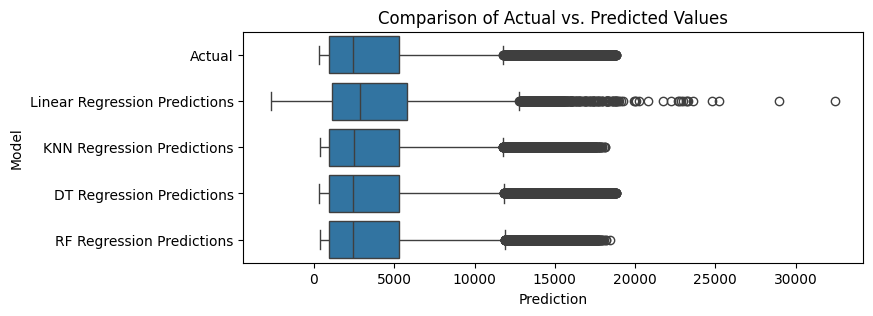

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()